## **TITANIC SURVIVAL PREDICTION**

-> Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

-> The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [25]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
df = sns.load_dataset('titanic')

In [27]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [29]:
df.isnull().sum() * 100 /len (df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [30]:
df.drop(columns = 'deck',inplace= True)

In [33]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

In [37]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [38]:
# Encode categorical features
label_encoders = {}
categorical_cols = ["sex", "embarked"]

In [40]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [43]:
# Select features and target variable
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
y = df["survived"]

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create a Random Forest Classifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [46]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.12%


### **BELOW IS THE GRAPHICAL REPRESENTATION OF SURVIVORS AND NON-SURVIVORS**

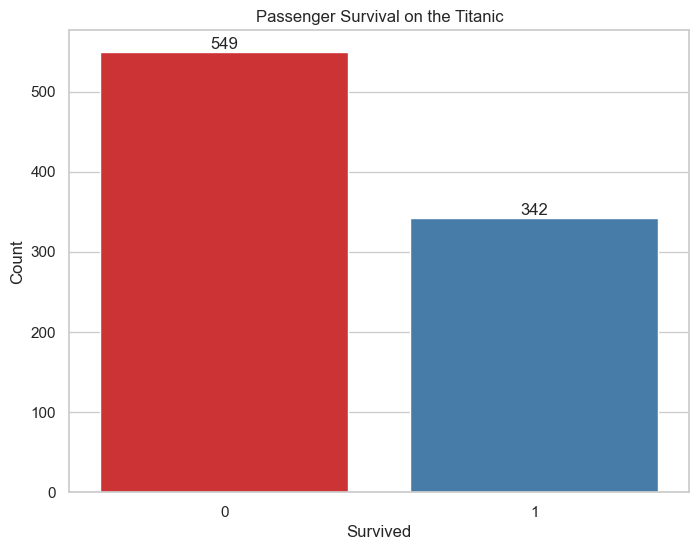

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of survivors (1) and non-survivors (0)
survival_counts = df['survived'].value_counts()

# Create a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="Set1")

# Set labels and title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Passenger Survival on the Titanic")

# Add annotations on the bars
for i, count in enumerate(survival_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()